1. Get data
2. Shape and Info
3. Basic Plot
4. Monthly and Yearly Mean

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download AAPL stock data for the past 5 years
stock_data = yf.download(['AAPL','GOOG'], start='2019-01-01', end='2024-01-01')

# Display first few rows
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price           Close                  High                   Low             \
Ticker           AAPL       GOOG       AAPL       GOOG       AAPL       GOOG   
Date                                                                           
2019-01-02  37.667175  52.045986  37.889001  52.367963  36.787034  50.546090   
2019-01-03  33.915249  50.563511  34.757226  52.599863  33.869929  50.464477   
2019-01-04  35.363075  53.283127  35.432248  53.289596  34.299275  51.128731   
2019-01-07  35.284363  53.167671  35.499034  53.446851  34.800166  52.489384   
2019-01-08  35.956985  53.560314  36.212204  53.972364  35.425085  52.776528   

Price            Open                Volume            
Ticker           AAPL       GOOG       AAPL      GOOG  
Date                                                   
2019-01-02  36.944458  50.588887  148158800  30652000  
2019-01-03  34.342199  51.804630  365248800  36822000  
2019-01-04  34.473394  51.386114  234428400  41878000  
2019-01-07  35.468025  53.322440  219111200  39638000  
2019-01-08  35.673145  53.551855  164101200  35298000

In [3]:
stock_data.shape

(1258, 10)

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (Close, GOOG)   1258 non-null   float64
 2   (High, AAPL)    1258 non-null   float64
 3   (High, GOOG)    1258 non-null   float64
 4   (Low, AAPL)     1258 non-null   float64
 5   (Low, GOOG)     1258 non-null   float64
 6   (Open, AAPL)    1258 non-null   float64
 7   (Open, GOOG)    1258 non-null   float64
 8   (Volume, AAPL)  1258 non-null   int64  
 9   (Volume, GOOG)  1258 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 108.1 KB


In [5]:
stock_data.Close.AAPL.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

<Axes: xlabel='Date'>

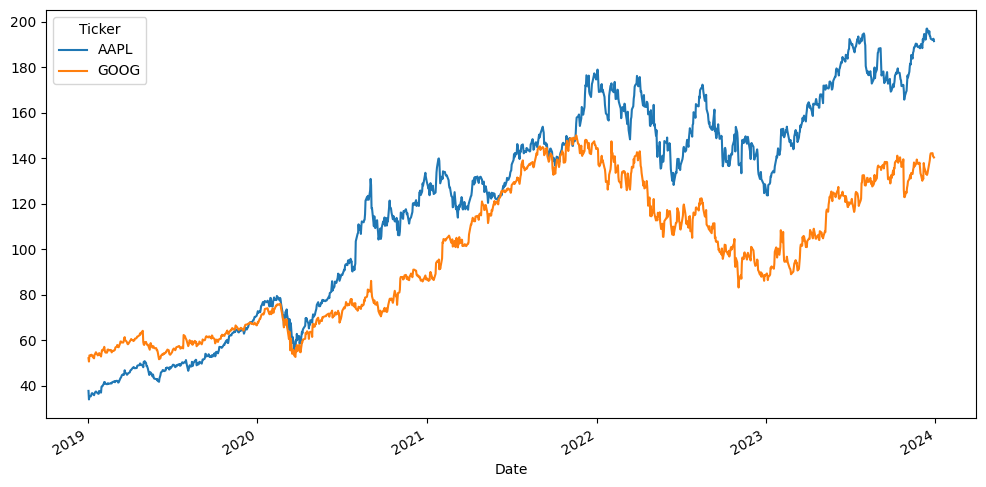

In [7]:
stock_data["Close"].plot(figsize=(12,6))

<Axes: xlabel='Date'>

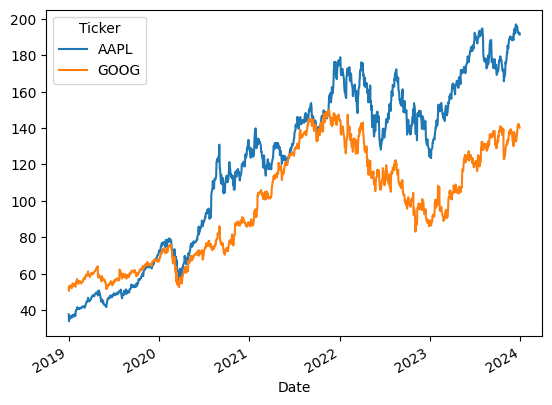

In [8]:
stock_data["Close"][["AAPL", "GOOG"]].plot()

In [23]:
monthly_mean = stock_data["Close"].groupby(level=0).resample("ME").mean() # ME is for month :)
monthly_mean

,Ticker,AAPL,GOOG
Date,Date,,
2019-01-02,2019-01-31,37.667175,52.045986
2019-01-03,2019-01-31,33.915249,50.563511
2019-01-04,2019-01-31,35.363075,53.283127
2019-01-07,2019-01-31,35.284363,53.167671
2019-01-08,2019-01-31,35.956985,53.560314
...,...,...,...
2023-12-22,2023-12-31,192.444580,142.047211
2023-12-26,2023-12-31,191.897873,142.146729
2023-12-27,2023-12-31,191.997269,140.773239


In [36]:
monthly_mean = stock_data["Close"].resample("ME").mean()
print(monthly_mean.head())
print(monthly_mean.tail())

Ticker           AAPL       GOOG
Date                            
2019-01-31  36.771821  53.360474
2019-02-28  41.090176  55.449472
2019-03-31  43.906865  58.681936
2019-04-30  48.032379  61.022280
2019-05-31  45.934181  57.266917
Ticker            AAPL        GOOG
Date                              
2023-08-31  179.680437  130.530875
2023-09-30  175.714644  134.559168
2023-10-31  173.397762  134.716014
2023-11-30  184.692049  134.232784
2023-12-31  193.148853  136.262102


In [34]:
monthly_mean.shape

(60, 2)

In [39]:
yearly_mean = stock_data["Close"].resample("YE").mean()
yearly_mean

Ticker,AAPL,GOOG
Date,,
2019-12-31,50.119620,59.139541
2020-12-31,92.836981,73.721014
2021-12-31,138.194069,124.938919
2022-12-31,152.607557,114.650681
2023-12-31,171.093879,119.047995
